In [1]:
import numpy as np
from numpy.testing import assert_array_almost_equal, assert_array_equal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
diabetes=pd.read_csv('diabetes.csv')

In [3]:
#Use pandas to find a description of each column with the outcome being 0 or 1
AverageZeros=diabetes[diabetes['Outcome']==0].describe().T
AverageOnes=diabetes[diabetes['Outcome']==1].describe().T


In [4]:
AverageZeros

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,109.980000,26.141200,0.000,93.00000,107.000,125.00000,197.000
BloodPressure,500.0,68.184000,18.063075,0.000,62.00000,70.000,78.00000,122.000
SkinThickness,500.0,19.664000,14.889947,0.000,0.00000,21.000,31.00000,60.000
Insulin,500.0,68.792000,98.865289,0.000,0.00000,39.000,105.00000,744.000
BMI,500.0,30.304200,7.689855,0.000,25.40000,30.050,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


In [5]:
AverageOnes

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,141.257463,31.939622,0.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,70.824627,21.491812,0.000,66.0000,74.000,82.000,114.00
SkinThickness,268.0,22.164179,17.679711,0.000,0.0000,27.000,36.000,99.00
Insulin,268.0,100.335821,138.689125,0.000,0.0000,0.000,167.250,846.00
BMI,268.0,35.142537,7.262967,0.000,30.8000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


In [6]:
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds


def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    matrix = np.copy(standardised_matrix * row_of_stds)
    return matrix + row_of_means


In [7]:
diabetes_dataset_path = "diabetes.csv"
pregnancies = np.genfromtxt(diabetes_dataset_path,
                    delimiter=",",
                    skip_header=1,
                    usecols=[0]).astype(int)
glucose = np.genfromtxt(diabetes_dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[1]).astype(int)
Blood_pressure = np.genfromtxt(diabetes_dataset_path,
                                delimiter=",",
                                skip_header=1,
                                usecols=[2]).astype(int)
Skin_thickness = np.genfromtxt(diabetes_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[3]).astype(int)
Insulin = np.genfromtxt(diabetes_dataset_path,
                                 delimiter=",",
                                 skip_header=1,
                                 usecols=[4]).astype(int)
BMI = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[5]).astype(float)
Pedigree = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[6]).astype(float)
Age = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[7]).astype(int)
outcome = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[8]).astype(int)
diabetes_input = np.c_[pregnancies,glucose,Blood_pressure,Skin_thickness,Insulin,BMI,Pedigree,Age]
diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(diabetes_input)

In [8]:
def plot_diabetes(data_input, data_output):
    characteristics_names =['Pregnancies', 'Glucose','BloodPressure','SkinThicnkess', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    number_of_characteristics = data_input.shape[1]
    diabetes_de_standardised = de_standardise(data_input, diabetes_row_of_means,
                                             diabetes_row_of_stds)
    diabetes_dataframe = pd.DataFrame(data=diabetes_de_standardised,
                                     columns=characteristics_names)
    diabetes_dataframe['Outcome'] = data_output
    sns.set_theme(style="ticks", color_codes=True)
    g = sns.PairGrid(diabetes_dataframe,
                     vars=diabetes_dataframe[:-1],
                     hue='Outcome')
    g.map_offdiag(sns.scatterplot)
    g.map_diag(plt.hist)
    plt.show()
    plt.tight_layout

In [9]:
# plot_diabetes(diabetes_input,diabetes_labels)

In [10]:
def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

In [11]:
def model_function(data_matrix, weights):
    return data_matrix @ weights

In [12]:
def logistic_function(inputs):
    return 1 / (1 + np.exp(-inputs))

In [13]:
def binary_prediction_function(data_matrix, weights):
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > 1/2

In [14]:
def gradient_descent(objective,gradient,initial_weights,step_size=1,no_of_iterations=100,print_output=10):
    
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1,m=no_of_iterations, 
                                                               o=objective_values[counter]))
            
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1,
                                                                       m=no_of_iterations, 
                                                                       o=objective_values[counter]))
    return weights, objective_values

In [15]:
def binary_logistic_regression_cost_function(data_matrix, data_labels,weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) -data_labels * regression_outputs)


In [16]:
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    return data_matrix.T @ (logistic_function(model_function(data_matrix, weights)) - data_labels) / len(data_matrix)

In [17]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels # this returns an array made of true and false 
    return np.mean(equal_labels) # the average is how many true we have


In [18]:
# performs a data split of a given dataset into two sets; one for testing, and one for cross-validation.
def data_split(data_matrix, validation_ratio):
    data_size = len(data_matrix)
    validation_size = int(round(data_size*validation_ratio,0))
    rows_indexes = np.random.choice(data_size,validation_size, replace = False)
    validation_data = data_matrix[rows_indexes,:]
    training_data = np.delete(data_matrix, obj = rows_indexes, axis = 0)
    
    return training_data, validation_data

In [19]:
#Testing with all the inputs
data_inputs = diabetes_input
data_outputs = outcome

data_matrix = np.c_[data_inputs, data_outputs]

training_data, validation_data = data_split(data_matrix, 0.2)

training_data_inputs=training_data[:,:-1]
training_data_outputs=training_data[:,-1].reshape(-1, 1)

validation_data_inputs=validation_data[:,:-1]
validation_data_outputs=validation_data[:,-1].reshape(-1, 1)

In [20]:
diabetes_data_matrix = linear_regression_data(training_data_inputs)

diabetes_cost_function = lambda weights: binary_logistic_regression_cost_function(diabetes_data_matrix,
                                                                                 training_data_outputs, weights)
diabetes_gradient_function = lambda weights: binary_logistic_regression_gradient(diabetes_data_matrix,
                                                                                training_data_outputs, weights)

diabetes_initial_weights = np.zeros((len(diabetes_data_matrix.T), 1))

diabetes_step_size = 3.9 * len(diabetes_data_matrix) / (np.linalg.norm(diabetes_data_matrix))**2

diabetes_optimal_weights, diabetes_objective_values_ =gradient_descent(diabetes_cost_function,
                                                                     diabetes_gradient_function,
                                                                     diabetes_initial_weights,
                                                                     diabetes_step_size,2000, 200)

predicted_labels= binary_prediction_function(diabetes_data_matrix,diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,training_data_outputs)

Iteration 200/2000, objective = 0.45683129568089914.
Iteration 400/2000, objective = 0.4568308685375703.
Iteration 600/2000, objective = 0.45683086852214444.
Iteration 800/2000, objective = 0.4568308685221438.
Iteration 1000/2000, objective = 0.4568308685221439.
Iteration 1200/2000, objective = 0.4568308685221439.
Iteration 1400/2000, objective = 0.4568308685221438.
Iteration 1600/2000, objective = 0.4568308685221438.
Iteration 1800/2000, objective = 0.4568308685221438.
Iteration 2000/2000, objective = 0.4568308685221438.
Iteration completed after 2000/2000, objective = 0.4568308685221438.


In [21]:
print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the training set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))

The optimal weights are w = [[-0.85555271  0.51884788  1.16153491 -0.24411194  0.02302342 -0.08663452
   0.74731685  0.32794261  0.14865107]].T.
The classification accuracy for the training set is 78.50162866449512 %.


In [22]:
diabetes_data_matrix = linear_regression_data(validation_data_inputs)

predicted_labels= binary_prediction_function(diabetes_data_matrix, diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,validation_data_outputs)

print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the 'Validation Set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))

The optimal weights are w = [[-0.85555271  0.51884788  1.16153491 -0.24411194  0.02302342 -0.08663452
   0.74731685  0.32794261  0.14865107]].T.
The classification accuracy for the 'Validation Set is 74.02597402597402 %.


In [23]:
#Testing without input Skin_thickness
diabetes_input = np.c_[pregnancies,glucose,Blood_pressure,Insulin,BMI,Pedigree,Age]
diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(diabetes_input)

data_inputs = diabetes_input
data_outputs = outcome

data_matrix = np.c_[data_inputs, data_outputs]

training_data, validation_data = data_split(data_matrix, 0.2)

training_data_inputs=training_data[:,:-1]
training_data_outputs=training_data[:,-1].reshape(-1, 1)

validation_data_inputs=validation_data[:,:-1]
validation_data_outputs=validation_data[:,-1].reshape(-1, 1)

diabetes_data_matrix = linear_regression_data(training_data_inputs)

diabetes_cost_function = lambda weights: binary_logistic_regression_cost_function(diabetes_data_matrix,
                                                                                 training_data_outputs, weights)
diabetes_gradient_function = lambda weights: binary_logistic_regression_gradient(diabetes_data_matrix,
                                                                                training_data_outputs, weights)

diabetes_initial_weights = np.zeros((len(diabetes_data_matrix.T), 1))

diabetes_step_size = 3.9 * len(diabetes_data_matrix) / (np.linalg.norm(diabetes_data_matrix))**2

diabetes_optimal_weights, diabetes_objective_values_ =gradient_descent(diabetes_cost_function,
                                                                     diabetes_gradient_function,
                                                                     diabetes_initial_weights,
                                                                     diabetes_step_size,2000, 200)

predicted_labels= binary_prediction_function(diabetes_data_matrix,diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,training_data_outputs)
print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the training set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))


Iteration 200/2000, objective = 0.4724434291943926.
Iteration 400/2000, objective = 0.4724433526297476.
Iteration 600/2000, objective = 0.4724433526293949.
Iteration 800/2000, objective = 0.4724433526293949.
Iteration 1000/2000, objective = 0.47244335262939496.
Iteration 1200/2000, objective = 0.4724433526293949.
Iteration 1400/2000, objective = 0.4724433526293949.
Iteration 1600/2000, objective = 0.4724433526293949.
Iteration 1800/2000, objective = 0.4724433526293949.
Iteration 2000/2000, objective = 0.4724433526293949.
Iteration completed after 2000/2000, objective = 0.4724433526293949.
The optimal weights are w = [[-0.87274955  0.44896597  1.19997106 -0.2446524  -0.09638635  0.61210588
   0.31123762  0.08856728]].T.
The classification accuracy for the training set is 77.52442996742671 %.


In [24]:
diabetes_data_matrix = linear_regression_data(validation_data_inputs)

predicted_labels= binary_prediction_function(diabetes_data_matrix, diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,validation_data_outputs)

print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the 'Validation Set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))

The optimal weights are w = [[-0.87274955  0.44896597  1.19997106 -0.2446524  -0.09638635  0.61210588
   0.31123762  0.08856728]].T.
The classification accuracy for the 'Validation Set is 79.22077922077922 %.


<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

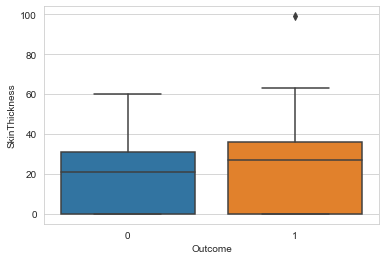

In [25]:
#Box PLot of Skin Thickness split between the Outcomes(0,1)
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = diabetes)

In [26]:
#Testing without the input Glucose
diabetes_input = np.c_[pregnancies,Blood_pressure,Skin_thickness,Insulin,BMI,Pedigree,Age]
diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(diabetes_input)

data_inputs = diabetes_input
data_outputs = outcome

data_matrix = np.c_[data_inputs, data_outputs]

training_data, validation_data = data_split(data_matrix, 0.2)

training_data_inputs=training_data[:,:-1]
training_data_outputs=training_data[:,-1].reshape(-1, 1)

validation_data_inputs=validation_data[:,:-1]
validation_data_outputs=validation_data[:,-1].reshape(-1, 1)

diabetes_data_matrix = linear_regression_data(training_data_inputs)

diabetes_cost_function = lambda weights: binary_logistic_regression_cost_function(diabetes_data_matrix,
                                                                                 training_data_outputs, weights)
diabetes_gradient_function = lambda weights: binary_logistic_regression_gradient(diabetes_data_matrix,
                                                                                training_data_outputs, weights)

diabetes_initial_weights = np.zeros((len(diabetes_data_matrix.T), 1))

diabetes_step_size = 3.9 * len(diabetes_data_matrix) / (np.linalg.norm(diabetes_data_matrix))**2

diabetes_optimal_weights, diabetes_objective_values_ =gradient_descent(diabetes_cost_function,
                                                                     diabetes_gradient_function,
                                                                     diabetes_initial_weights,
                                                                     diabetes_step_size,2000, 200)

predicted_labels= binary_prediction_function(diabetes_data_matrix,diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,training_data_outputs)
print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the training set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))


Iteration 200/2000, objective = 0.5443803584635092.
Iteration 400/2000, objective = 0.5443803576124717.
Iteration 600/2000, objective = 0.5443803576124717.
Iteration 800/2000, objective = 0.5443803576124717.
Iteration 1000/2000, objective = 0.5443803576124717.
Iteration 1200/2000, objective = 0.5443803576124717.
Iteration 1400/2000, objective = 0.5443803576124717.
Iteration 1600/2000, objective = 0.5443803576124717.
Iteration 1800/2000, objective = 0.5443803576124717.
Iteration 2000/2000, objective = 0.5443803576124717.
Iteration completed after 2000/2000, objective = 0.5443803576124717.
The optimal weights are w = [[-0.78910151  0.33637148 -0.17734861 -0.16757339  0.23755581  0.8026379
   0.28298792  0.44622498]].T.
The classification accuracy for the training set is 69.54397394136808 %.


In [27]:
diabetes_data_matrix = linear_regression_data(validation_data_inputs)

predicted_labels= binary_prediction_function(diabetes_data_matrix, diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,validation_data_outputs)

print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the 'Validation Set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))

The optimal weights are w = [[-0.78910151  0.33637148 -0.17734861 -0.16757339  0.23755581  0.8026379
   0.28298792  0.44622498]].T.
The classification accuracy for the 'Validation Set is 70.77922077922078 %.


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

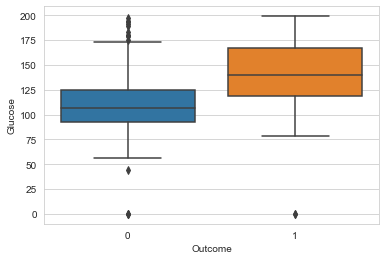

In [28]:
#Box PLot of Glucose split between the Outcomes(0,1)
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Outcome', y = 'Glucose', data = diabetes)

In [35]:
#Testing without the inputs Skin_thickness and Blood_pressure
diabetes_input = np.c_[pregnancies,glucose,Insulin,BMI,Pedigree,Age]
diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(diabetes_input)

data_inputs = diabetes_input
data_outputs = outcome

data_matrix = np.c_[data_inputs, data_outputs]

training_data, validation_data = data_split(data_matrix, 0.2)

training_data_inputs=training_data[:,:-1]
training_data_outputs=training_data[:,-1].reshape(-1, 1)

validation_data_inputs=validation_data[:,:-1]
validation_data_outputs=validation_data[:,-1].reshape(-1, 1)

diabetes_data_matrix = linear_regression_data(training_data_inputs)

diabetes_cost_function = lambda weights: binary_logistic_regression_cost_function(diabetes_data_matrix,
                                                                                 training_data_outputs, weights)
diabetes_gradient_function = lambda weights: binary_logistic_regression_gradient(diabetes_data_matrix,
                                                                                training_data_outputs, weights)

diabetes_initial_weights = np.zeros((len(diabetes_data_matrix.T), 1))

diabetes_step_size = 3.9 * len(diabetes_data_matrix) / (np.linalg.norm(diabetes_data_matrix))**2

diabetes_optimal_weights, diabetes_objective_values_ =gradient_descent(diabetes_cost_function,
                                                                     diabetes_gradient_function,
                                                                     diabetes_initial_weights,
                                                                     diabetes_step_size,2000, 200)

predicted_labels= binary_prediction_function(diabetes_data_matrix,diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,training_data_outputs)
print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the training set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))


Iteration 200/2000, objective = 0.48439368432768565.
Iteration 400/2000, objective = 0.484393680504727.
Iteration 600/2000, objective = 0.48439368050472603.
Iteration 800/2000, objective = 0.48439368050472603.
Iteration 1000/2000, objective = 0.48439368050472603.
Iteration 1200/2000, objective = 0.48439368050472603.
Iteration 1400/2000, objective = 0.48439368050472603.
Iteration 1600/2000, objective = 0.48439368050472603.
Iteration 1800/2000, objective = 0.48439368050472603.
Iteration 2000/2000, objective = 0.48439368050472603.
Iteration completed after 2000/2000, objective = 0.48439368050472603.
The optimal weights are w = [[-0.86031326  0.45968383  1.01538612 -0.18155923  0.67171425  0.26461609
   0.09390444]].T.
The classification accuracy for the training set is 77.0358306188925 %.


In [36]:
diabetes_data_matrix = linear_regression_data(validation_data_inputs)

predicted_labels= binary_prediction_function(diabetes_data_matrix, diabetes_optimal_weights)

diabetes_accuracy_rate = classification_accuracy(predicted_labels,validation_data_outputs)

print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("The classification accuracy for the 'Validation Set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))

The optimal weights are w = [[-0.86031326  0.45968383  1.01538612 -0.18155923  0.67171425  0.26461609
   0.09390444]].T.
The classification accuracy for the 'Validation Set is 79.87012987012987 %.


<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

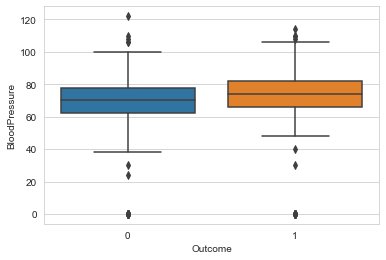

In [37]:
#Box PLot of Blood Pressure split between the Outcomes(0,1)
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = diabetes)

# KNN

In [74]:
diabetes_dataset_path = "diabetes.csv"
pregnancies = np.genfromtxt(diabetes_dataset_path,
                    delimiter=",",
                    skip_header=1,
                    usecols=[0]).astype(int)
glucose = np.genfromtxt(diabetes_dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[1]).astype(int)
Blood_pressure = np.genfromtxt(diabetes_dataset_path,
                                delimiter=",",
                                skip_header=1,
                                usecols=[2]).astype(int)
Skin_thickness = np.genfromtxt(diabetes_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[3]).astype(int)
Insulin = np.genfromtxt(diabetes_dataset_path,
                                 delimiter=",",
                                 skip_header=1,
                                 usecols=[4]).astype(int)
BMI = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[5]).astype(float)
Pedigree = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[6]).astype(float)
Age = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[7]).astype(float)
Outcome = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[8]).astype(int)
indexes = np.argsort(pregnancies)
diabetes_output = Outcome[indexes]
diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],Blood_pressure[indexes],Skin_thickness[indexes],Insulin[indexes],BMI[indexes],Pedigree[indexes],Age[indexes]]
diabetes_labels = Outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

In [75]:
def pairwise_distances(from_data, to_data):
    return np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2,axis=2))


In [76]:
def nearest_neighbour_classification(testing_inputs, training_inputs,training_outputs, no_of_neighbours):
    
    distances = pairwise_distances(testing_inputs, training_inputs)
    
    no_of_classes = 1 + np.max(training_outputs)
    sorted_indices = np.argsort(distances, axis=1)
    
    no_of_inputs = len(testing_inputs) 
    no_of_points = len(training_inputs)
    
    new_array_to_sort = np.broadcast_to(training_outputs,(no_of_inputs, no_of_points))
    
    sorted_labels = np.take_along_axis(new_array_to_sort,sorted_indices, 1)
    
    predicted_labels=np.zeros(no_of_inputs,int)
    for id_input in range(no_of_inputs):
        
        probability_labels=np.zeros(no_of_classes,float)
        
        for id_neighbor in range(0,no_of_neighbours):
            probability_labels[sorted_labels[id_input][id_neighbor]]+=1./no_of_neighbours

        predicted_labels[id_input]=np.argmax(probability_labels)
    
    
    return predicted_labels

In [77]:
def KFold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    return indexes_split


def KFold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation,
                           missclassification_evaluation,knn):
    
    data_size = len(data_inputs)
    indexes_split = KFold_split(data_size, K)

    average_accuracy = 0
    for i in range(K):
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        
        predicted_labels = labels_evaluation(data_inputs[indexes_split[i]],
                                             data_inputs[training_indexes],
                                             data_outputs[training_indexes],knn)
        
        accuracy = missclassification_evaluation(predicted_labels,
                                              data_outputs[indexes_split[i]])
        average_accuracy += accuracy / K
        
    error = 1.-average_accuracy
    return error

In [78]:
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]

In [79]:
# KNN range, should be around square root our sample size N and K value should be an odd number, in this case 5
K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

In [80]:
print("Optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

Optimal number of neighbours one needs to consider is equal to 19. 
In this case the prediction error would be as little as 23.95%.


In [81]:
#Testing without the input Skin_Thickness
indexes = np.argsort(pregnancies)
diabetes_output = Outcome[indexes]
diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],Blood_pressure[indexes],Insulin[indexes],BMI[indexes],Pedigree[indexes],Age[indexes]]
diabetes_labels = Outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)


K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

print("Optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))


Optimal number of neighbours one needs to consider is equal to 14. 
In this case the prediction error would be as little as 22.52%.


In [82]:
#Testing without the input GLucose
indexes = np.argsort(pregnancies)
diabetes_output = Outcome[indexes]
diabetes_input = np.c_[pregnancies[indexes],Blood_pressure[indexes],Skin_thickness[indexes],Insulin[indexes],BMI[indexes],Pedigree[indexes],Age[indexes]]
diabetes_labels = Outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)


K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

print("Optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))


Optimal number of neighbours one needs to consider is equal to 7. 
In this case the prediction error would be as little as 28.91%.


In [83]:
#Testing without the inputs, Skin_thickness and Blood Pressure
indexes = np.argsort(pregnancies)
diabetes_output = Outcome[indexes]
diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],Pedigree[indexes],Insulin[indexes],BMI[indexes],Age[indexes]]
diabetes_labels = Outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)


K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

print("Optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))


Optimal number of neighbours one needs to consider is equal to 21. 
In this case the prediction error would be as little as 22.53%.
